## Data Description 
1. distance (km)- distance of one ride in kilometer
2. consume- the consume (L/100km)per kilometer
3. speed- the average speed (km/h)
4.  temp_inside- the temperature had in inside (°C)
5. temp_outside- the temperature had in outside (°C)
6. Gas_type- type of gas

In [2]:
# import all nedded file
import numpy as np # linear algebra
import pandas as pd# data analysis and manipulation
import os # assign path
import matplotlib.pyplot as plt# data visualization 
import seaborn as sns #data visualization & heatmap creation

In [3]:
# read data excel file and create dataframe
measurement = pd.read_excel('measurements2.xlsx')# upload xml file
gas_measurement = pd.DataFrame(measurement, columns = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type', 'rain', 'sun']) # features we want to select
gas_measurement['gas_type'] = gas_measurement['gas_type'].map({'SP98': 1, 'E10': 0})# define categorial value

In [4]:
gas_measurement

,distance,consume,speed,temp_inside,temp_outside,gas_type,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0
386,15.4,4.6,42,25.0,31,1,0,0


In [5]:
gas_measurement.shape # shape of dataframe

(388, 8)

In [6]:
gas_measurement.describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.587629,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.492897,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,1.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,1.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


**The describe() function computes a summary of statistics pertaining to the DataFrame columns.**
1. count() present total count of every column data.
2. mean()present avg/mean values/data in every column.
3. std() present the standard daviation value in every column.
4. min() present the minimum value of data in every column.
5. max() present the maximum value of data in every column.


In [7]:
#The info() function is used to show range of index,column type,data type,memory usage.
# for knowing datatype and columns type, using here info() function
gas_measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    int64  
 6   rain          388 non-null    int64  
 7   sun           388 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.3 KB


## missing value handling

In [8]:
#missing value finding
gas_measurement.isnull().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
rain             0
sun              0
dtype: int64

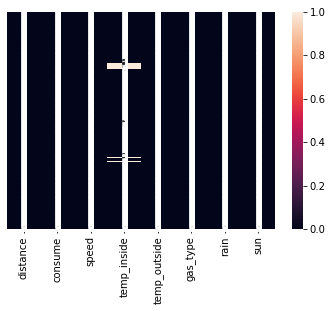

In [9]:
# missing value visualize
sns.heatmap(gas_measurement.isnull(),yticklabels=False, annot=True)

In [11]:
# find duplicate value
gas_measurement.duplicated().sum()

0

In [ ]:
gas_measurement.drop_duplicates()

In [12]:
# drop na/null value
gas_measurement=gas_measurement.dropna()

In [38]:
gas_measurement.tail(10)

,distance,consume,speed,temp_inside,temp_outside,gas_type,rain,sun
378,16.2,4.4,39,24.5,17,1,0,0
379,16.7,3.8,44,24.5,23,1,0,1
380,8.3,5.0,52,24.5,27,1,0,0
381,5.5,3.7,33,24.5,28,1,0,1
382,13.6,3.7,33,24.5,28,1,0,1
383,16.0,3.7,39,24.5,18,1,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0
386,15.4,4.6,42,25.0,31,1,0,0
387,14.7,5.0,25,25.0,30,1,0,0


In [14]:
# after handling missing value
gas_measurement.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
rain            0
sun             0
dtype: int64

In [39]:
gas_measurement.shape

(376, 8)

In [15]:
# count gas type value
gas_measurement['gas_type'].value_counts()

1    219
0    157
Name: gas_type, dtype: int64

In [17]:
from sklearn.decomposition import PCA #PRINCIPAL COMPONENT ANALYSIS
x=gas_measurement
np.mean(x),np.std(x)

(distance        19.797340
 consume          4.925266
 speed           41.957447
 temp_inside     21.929521
 temp_outside    11.340426
 gas_type         0.582447
 rain             0.125000
 sun              0.082447
 dtype: float64,
 distance        22.958288
 consume          1.039320
 speed           13.696105
 temp_inside      1.009111
 temp_outside     7.057595
 gas_type         0.493156
 rain             0.330719
 sun              0.275044
 dtype: float64)

In [21]:
pca_gas = PCA(n_components=2)
principalComponents_gas = pca_gas.fit_transform(x)
principal_gas_Df = pd.DataFrame(data = principalComponents_gas, columns = ['principal component 1', 'principal component 2'])
principal_gas_Df.tail()

,principal component 1,principal component 2
371,-4.471670,1.618211
372,-4.454208,3.372558
373,-2.087447,-3.828416
374,-3.527340,-0.569393
375,-10.880868,14.711422


In [22]:
print('Explained variation per principal component: {}'.format(pca_gas.explained_variance_ratio_))

Explained variation per principal component: [0.78688304 0.14571189]


 ##  Model Implementation

In [25]:
from sklearn.model_selection import train_test_split # split train and test data
y_data = gas_measurement['consume']
x_data = gas_measurement.drop('consume', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

### Linear regression

In [34]:
from sklearn.linear_model import LinearRegression #linear regression 
lm = LinearRegression()
lm.fit(x_train, y_train)
lm.score(x_train, y_train)


0.2204855914843996

In [35]:
lm.score(x_test, y_test) # R^2 score for test set

0.015811269078610413

### Polynomial Regression

In [67]:
from sklearn.preprocessing import PolynomialFeatures #polynomial regression
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
poly.score(x_train_pr, y_train)

0.14725267826616018

In [68]:
poly.score(x_test_pr, y_test)

-14.642817859224852

### Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha=1.0)
rid_reg.fit(x_train, y_train)
rid_reg.score(x_train, y_train)

0.2204348712654609

In [76]:
rid_reg.score(x_test, y_test)

0.019183452547136493

### Lasso Regression(multiple linear regression)

In [77]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_train, y_train)

0.17544110963820136

In [78]:
lasso_reg.score(x_test, y_test)

0.02706342512731552

In [90]:
from sklearn import linear_model
multi_reg = linear_model.LinearRegression()
multi_reg.fit(x_train, y_train)
multi_reg.score(x_train, y_train)

0.2204855914843996

In [91]:
multi_reg.score(x_test, y_test)

0.0158112690786103

### Visualization of those model

In [40]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 7
    height = 6
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Features')
    plt.ylabel('Prediction (cosumption)')

    plt.show()
    plt.close()

**visualization of Polynomial Regression**

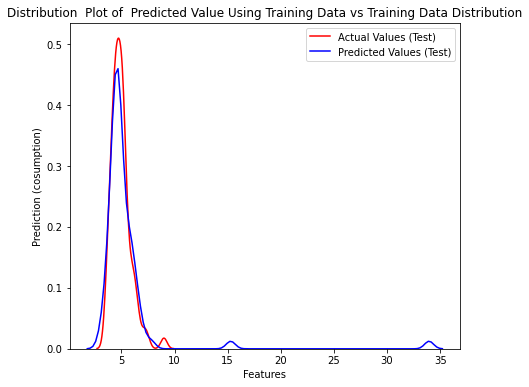

In [82]:
Yhat_test_pr = poly.predict(x_test_pr)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, Yhat_test_pr,"Actual Values (Test)", "Predicted Values (Test)", Title)

**visualization of Ridge Regression**

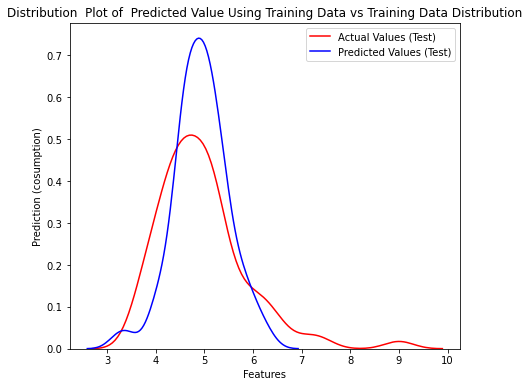

In [84]:
Yhat_test_rid = rid_reg.predict(x_test)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, Yhat_test_rid,"Actual Values (Test)", "Predicted Values (Test)", Title)

**visualization of Lasso Regression**

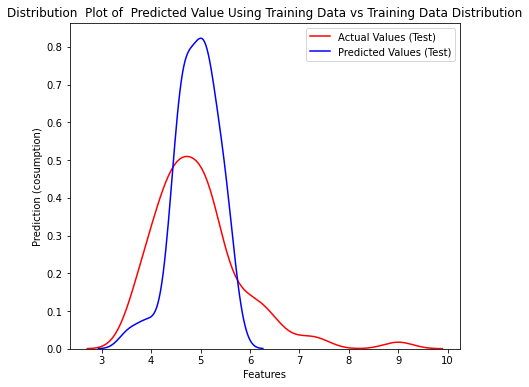

In [86]:
Yhat_test_las = lasso_reg.predict(x_test)
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, Yhat_test_las,"Actual Values (Test)", "Predicted Values (Test)", Title)

**visualization of Linear regression Regression**

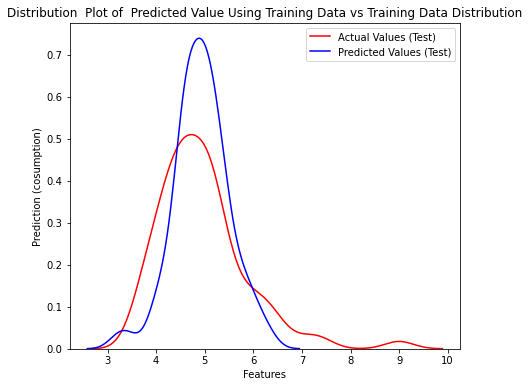

In [83]:
Yhat_test = lm.predict(x_test)
DistributionPlot(y_test, Yhat_test,"Actual Values (Test)", "Predicted Values (Test)", Title)

In [100]:
#Linear relationship assumption

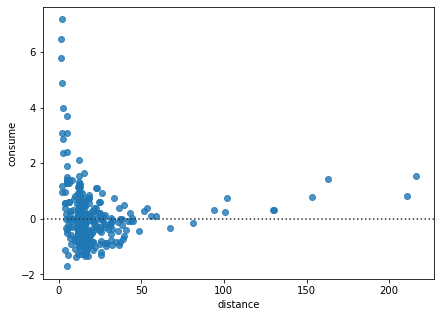

In [79]:
 # residual plot 
width = 7
height = 5
plt.figure(figsize=(width, height))
sns.residplot(gas_measurement['distance'], gas_measurement['consume'])
plt.show()

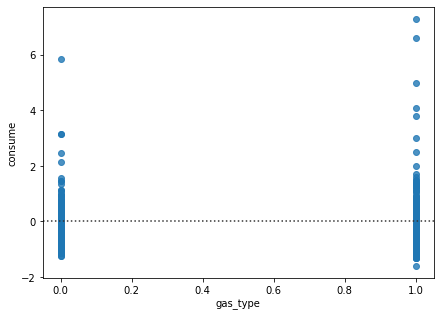

In [80]:
# residual plot 
width = 7
height = 5
plt.figure(figsize=(width, height))
sns.residplot(gas_measurement[ 'gas_type'], gas_measurement['consume'])
plt.show()

In [ ]:
#Multivariate normality

[Text(0, 0.5, 'values'), Text(0.5, 0, 'features')]

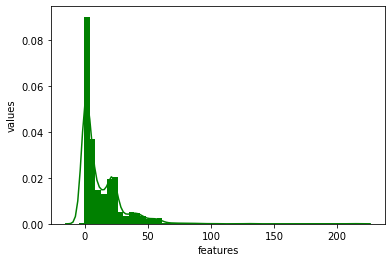

In [106]:
from scipy.stats import poisson
import seaborn as sb

ax = sb.distplot(gas_measurement,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='features', ylabel='values')

In [101]:
#No or little multicollinearity

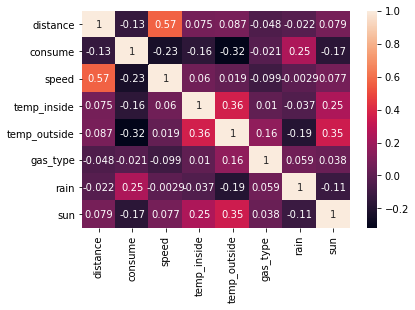

In [108]:
corrMatrix = gas_measurement.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [109]:
#No auto-correlation

In [113]:
from statsmodels.stats.stattools import durbin_watson
gfg = durbin_watson(gas_measurement)
print(gfg)

[7.20944722e-01 7.44412081e-02 1.58026738e-01 1.06096624e-03
 1.15198855e-01 3.19634703e-02 1.19148936e+00 1.29032258e+00]


In [114]:
#Homoscedasticity

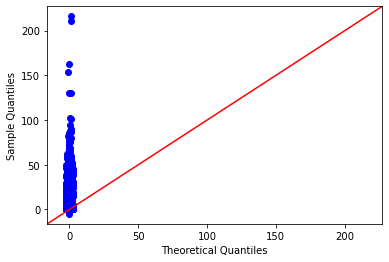

In [116]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(gas_measurement, line ='45')
py.show()

Regression Analysis –assumptions:

1. The dependent and independent variables show a linear relationship between the slope and the intercept.
2. The independent variable is not random.
3. The value of the residual (error) is zero.
4. The value of the residual (error) is constant across all observations.
5. The value of the residual (error) is not correlated across all observations.
6. The residual (error) values follow the normal distribution.